In [5]:
import re

# List of strings to search
strings = [
    "3/5",
    "**Rating:** 2",
    "2 out of 5",
    "4.5/5",
    "Unrelated text",
    "**Rating:** 4.7",
    "Not a match"
]

# Regex pattern to match the desired formats
pattern = r'(\d+(\.\d+)?\s*/\s*\d+)|(\*\*Rating:\*\*\s*\d+(\.\d+)?)|(\d+(\.\d+)?\s*out\s+of\s+\d+)'

# Iterate through the list and extract matches
matches = []
for string in strings:
    match = re.search(pattern, string)
    if match:
        matches.append(match.group())

# Print the matches
print("Extracted Matches:")
for match in matches:
    print(match)


Extracted Matches:
3/5
**Rating:** 2
2 out of 5
4.5/5
**Rating:** 4.7


## Extraction

In [15]:
import os

def read_text_from_directory(directory_path):
    """
    Reads the text content from all files in a specified directory into a list.

    Args:
        directory_path (str): Path to the directory containing text files.

    Returns:
        List[str]: A list of text content from each file.
    """
    text_in_files = {}

    try:
        # Iterate over all files in the directory
        for filename in os.listdir(directory_path):
            if 'linear' in filename:
                continue
            file_path = os.path.join(directory_path, filename)
            
            # Check if it is a file
            if os.path.isfile(file_path):
                with open(file_path, 'r', encoding='utf-8') as file:
                    text = file.read().split('----------------------------------------')
                    text_in_files[filename]=text
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return text_in_files

# Example usage
directory_path = '../reviews'  # Replace with your directory path
text_content = read_text_from_directory(directory_path)

In [16]:
def extract_first_number(input_string):
    # Use regex to find the first number in the string
    match = re.search(r'\d+', input_string)
    if match:
        return int(match.group())
    return None  # Return None if no number is found

In [17]:
import re

# Regex pattern to match the desired formats
pattern = r'(\d+(\.\d+)?\s*/\s*\d+)|(\*\*Rating:\*\*\s*\d+(\.\d+)?)|(\d+(\.\d+)?\s*out\s+of\s+\d+)'

# Iterate through the list and extract matches
ratings = {}
for key, lines in text_content.items():
    
    ratings_on_file = []
    for line in lines:
        match = re.search(pattern, line)
        if match:
            ratings_on_file.append(extract_first_number(match.group()))
            
    ratings[key] = ratings_on_file

In [18]:
import numpy as np
import matplotlib.pyplot as plt

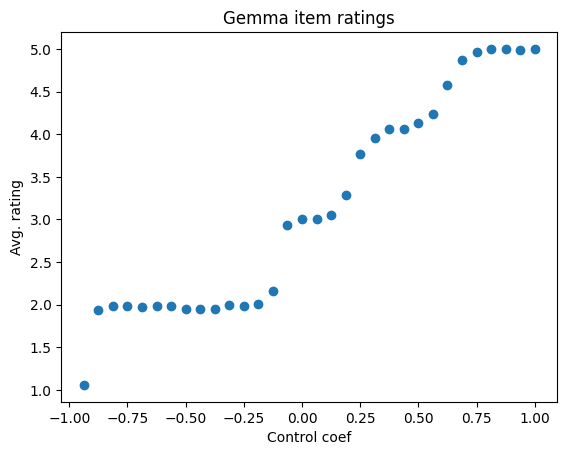

In [28]:
model_sub = 'gemma'
xs = []
ys = []

xs_lin = []
ys_lin = []
for key, scores in ratings.items():
    if model_sub in key:
        tokens = key.split('_')
        coef = tokens[6]
        x = float(coef)
        if len(scores)==0:
            continue
        y = np.mean(scores)
        xs.append(x)
        ys.append(y)
        
        # if 'linear' in key:
        #     xs_lin.append(x)
        #     ys_lin.append(y)
            
ysg = ys
xsg = [x/max(np.abs(xs)) for x in xs]
plt.scatter(xsg, ysg, label='rfm')
# plt.scatter(xs_lin, ys_lin, label='linear')
# plt.legend()
plt.title('Gemma item ratings')
plt.xlabel('Control coef')
plt.ylabel('Avg. rating')
plt.show()

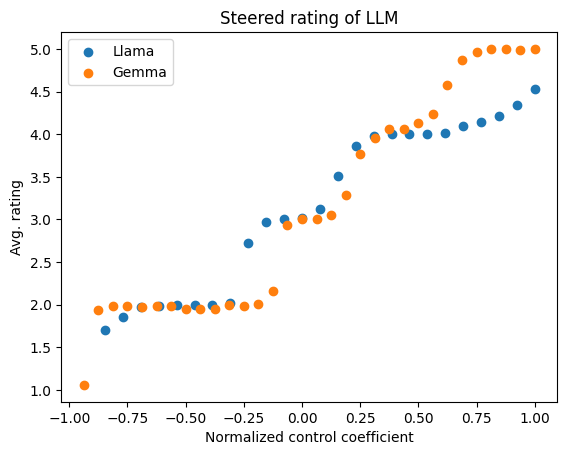

In [35]:
model_sub = 'llama'
xs = []
ys = []

xs_lin = []
ys_lin = []
for key, scores in ratings.items():
    if model_sub in key:
        tokens = key.split('_')
        coef = tokens[6]
        x = float(coef)
        
        if x<-0.55:
            continue
            
        if len(scores)==0:
            continue
        y = np.mean(scores)
        xs.append(x)
        ys.append(y)
        
        
        if 'linear' in key:
            xs_lin.append(x)
            ys_lin.append(y)

ysl = ys
xsl = [x/max(np.abs(xs)) for x in xs]
plt.scatter(xsl, ysl, label='Llama')
plt.scatter(xsg, ysg, label='Gemma')
# plt.scatter(xs_lin, ys_lin, label='linear')
plt.legend()
plt.title('Steered rating of LLM')
plt.xlabel('Normalized control coefficient')
plt.ylabel('Avg. rating')
plt.savefig('steered_ratings.pdf',format='pdf')